In [ ]:
# The following two lines are only necessary to run once.
# Comment out otherwise for speed-up.
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

query = """SELECT ID, NmMotivoContratoFinanceiro,
Sub_Produto,
VrContrato,
VrFinanciamento,
VrEntrada,
QtParcelas,
AaFabricacaoVeiculo,
CdMarca,
VrMercado,
FlZeroKm,
QtCilindradaVeiculo,
QtQuilometragemVeiculo,
QtAnoIdade, fl_renovou,duracao_segundos FROM `hacka-1.dataset.view_dados_hacka`"""
job = client.query(query)
df = job.to_dataframe()

In [ ]:
df.shape

(50000, 16)

In [ ]:
df.head()

,ID,NmMotivoContratoFinanceiro,Sub_Produto,VrContrato,VrFinanciamento,VrEntrada,QtParcelas,AaFabricacaoVeiculo,CdMarca,VrMercado,FlZeroKm,QtCilindradaVeiculo,QtQuilometragemVeiculo,QtAnoIdade,fl_renovou,duracao_segundos
0,241,FLUXO FINANCEIRO INICIAL,REFINANCIAMENTO VEICULOS DE PASSEIO,0.970832,1.386345,0.870025,60,2021.0,HYUNDAI,1.595703,S,1600.000000,0.0,1.0,0,68.0
1,284,CONTRATO CEDIDO (FIDC),CDC VEICULOS DE PASSEIO,0.743053,0.946475,-1.388334,36,2004.0,VOLKSWAGEN,0.611034,N,1596.900027,115190.0,18.0,0,NaN
2,870,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,1.026859,0.536553,1.152621,48,2021.0,HYUNDAI,1.068751,N,1593.364512,115263.0,1.0,0,105.0
3,1220,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,-0.162695,-0.532558,0.954269,48,2004.0,FORD,-0.522875,N,1600.000000,121981.0,18.0,0,66.0
4,1439,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,-0.964986,-1.203160,1.097747,60,2021.0,FIAT,-1.623163,N,1000.000000,104178.0,1.0,0,67.0


In [ ]:
df.count()/len(df.index)

ID                            1.00000
NmMotivoContratoFinanceiro    1.00000
Sub_Produto                   1.00000
VrContrato                    1.00000
VrFinanciamento               0.99998
VrEntrada                     0.99694
QtParcelas                    1.00000
AaFabricacaoVeiculo           0.99964
CdMarca                       1.00000
VrMercado                     0.99986
FlZeroKm                      1.00000
QtCilindradaVeiculo           0.99884
QtQuilometragemVeiculo        0.97134
QtAnoIdade                    0.99964
fl_renovou                    1.00000
dtype: float64

In [ ]:
df_subprod = df.groupby(by=['NmMotivoContratoFinanceiro','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,NmMotivoContratoFinanceiro,0,1,perc
0,CONTRATO CEDIDO (FIDC),8805,279,3.071334
1,CORREÇAO DE FLUXO FINANCEIRO / REIMPLANTE,75,4,5.063291
2,FLUXO FINANCEIRO INICIAL,35200,1190,3.270129
3,RENEGOCIAÇAO,3921,106,2.632232
4,SALDO REMANESCENTE,409,11,2.619048


In [ ]:
df_subprod = df.groupby(by=['Sub_Produto','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,Sub_Produto,0,1,perc
0,CDC CAMINHOES,79.0,4.0,4.819277
1,CDC VANS e MICRO-ONIBUS,324.0,12.0,3.571429
2,CDC VEICULOS DE PASSEIO,45471.0,1533.0,3.261425
3,CP COM GARANTIA,111.0,2.0,1.769912
4,MOTO,531.0,9.0,1.666667
5,Outros,31.0,NaN,NaN
6,PRE APROVADO CDC VEICULOS DE PASSEIO,330.0,3.0,0.900901
7,REFINANCIAMENTO VEICULOS DE PASSEIO,1533.0,27.0,1.730769


Manteremos apenas os usuários vinculados a veículos de passeio

<AxesSubplot:xlabel='fl_renovou'>

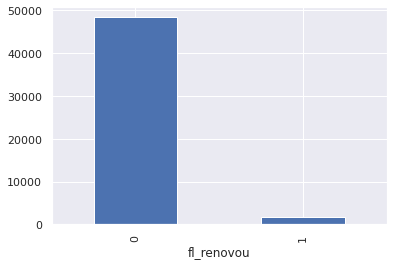

In [ ]:
df.groupby(by='fl_renovou').ID.count().plot(kind='bar')

In [ ]:
df_subprod = df.groupby(by=['AaFabricacaoVeiculo','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,AaFabricacaoVeiculo,0,1,perc
0,2003.0,7.0,NaN,NaN
1,2004.0,72.0,NaN,NaN
2,2005.0,421.0,5.0,1.173709
3,2006.0,388.0,14.0,3.482587
4,2007.0,1.0,NaN,NaN
5,2008.0,3339.0,78.0,2.282704
6,2009.0,3463.0,139.0,3.858967
7,2010.0,6208.0,223.0,3.467579
8,2011.0,5567.0,219.0,3.784998
9,2012.0,5862.0,233.0,3.822806


In [ ]:
df_subprod = df.groupby(by=['QtParcelas','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,QtParcelas,0,1,perc
0,11,2.0,NaN,NaN
1,12,9.0,1.0,10.000000
2,13,115.0,6.0,4.958678
3,14,174.0,8.0,4.395604
4,15,4.0,NaN,NaN
5,16,4.0,NaN,NaN
6,17,6.0,NaN,NaN
7,18,1.0,NaN,NaN
8,19,1.0,NaN,NaN
9,20,2.0,NaN,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


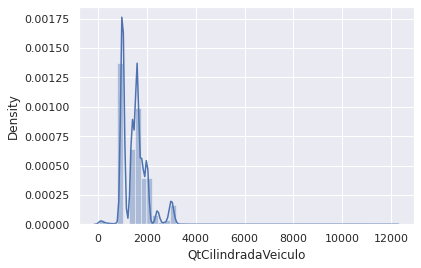

In [ ]:
x = df.QtCilindradaVeiculo
ax = sns.distplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


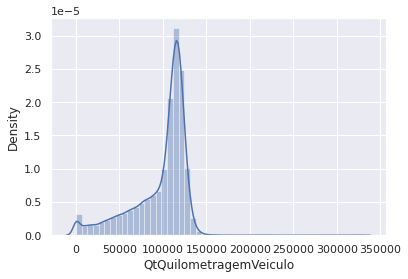

In [ ]:
x = df.QtQuilometragemVeiculo
ax = sns.distplot(x)

<AxesSubplot:xlabel='QtAnoIdade'>

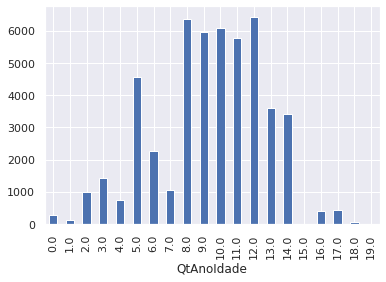

In [ ]:
df.groupby(by='QtAnoIdade').ID.count().plot(kind='bar')

<AxesSubplot:xlabel='AaFabricacaoVeiculo'>

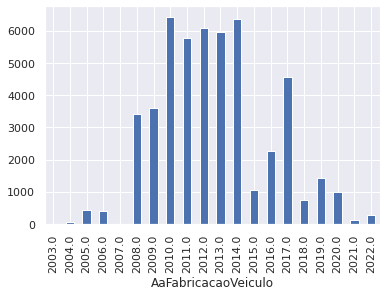

In [ ]:
df.groupby(by='AaFabricacaoVeiculo').ID.count().plot(kind='bar')